In [1]:
from AD_analysis import *
import Atmospheric_diffraction as atm_shift
import numpy as np
import matplotlib as mpl
import Integ_analysis as int_analysis

In [2]:
def plot_integ_trans(aperture_centres,guide,analysis,parallatic=True):  
    weights = np.arange(0, len(aperture_centres)+1)
    norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.RdBu)

    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_centres,guide,parallatic)

    # plt.figure(figsize=[7,5])


    # for count,i in enumerate(integ_transmissions):
    #     plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {}'.format(aperture_centres[count]),color=cmap.to_rgba(len(aperture_centres)-count))
    #     print(int_analysis.integ_metric(np.array(i)/np.array(opt_transmission),"min trans"))
    # plt.axhline(y=1,label='No AD Transmission',color='black',linestyle='--')
    # plt.ylabel("Mean Transmission Relative to No AD")
        
    # plt.legend()
    # plt.title("Guiding = {}, HA {}-{}h, Dec = {}".format(guide,analysis.input_parameters['HA_range'][0],analysis.input_parameters['HA_range'][-1],analysis.input_parameters['targ_dec']))

    # plt.ylim(0,1.1)
    # plt.xlabel("Wavelength (nm)")
    
    
    

# +Y = 1st Observation HA

[1.         1.16666667 1.33333333 1.5        1.66666667 1.83333333
 2.        ]
Target goes below Horizon above/below HA of +/- 6.0h
[[-0.04484992  0.          0.04134703  0.07955338  0.11493477  0.14776759
   0.17829468]
 [-0.07980408 -0.04048758  0.03527281  0.06527278  0.09975199  0.13312473
   0.16462068]
 [-0.12266983 -0.0822094  -0.05967718  0.06631761  0.09176117  0.12225312
   0.15305428]
 [-0.16883805 -0.12539568 -0.09462013  0.08349369  0.09379762  0.11680459
   0.14446047]
 [-0.21754124 -0.17030358 -0.13338728 -0.1107955   0.10637493  0.11829381
   0.13987533]
 [-0.26876151 -0.21722351 -0.17479109 -0.14383129 -0.12754984  0.12738144
   0.14032113]
 [-0.32272381 -0.26648687 -0.21869937 -0.18078413 -0.1550299   0.14364806
   0.14652365]] arcsec
[1.1388696  1.15344868 1.17066319 1.19070021 1.21378584 1.24019179
 1.27024398]
SHIFTS FROM CENTRE ARE EQUAL!


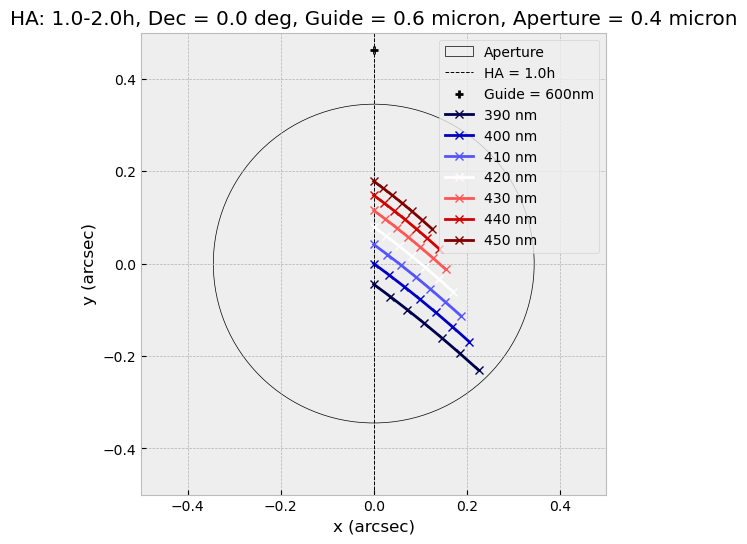

In [42]:
HA_range=np.linspace(1,2,7)
print(HA_range)
aperture=.4*u.micron
guide=.6 * u.micron
targ_dec=0*u.deg

analysis=AD_analysis()
analysis.load_wave('LR','VIS','B','B',sampling=10*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture)

weights = np.arange(0, len(analysis.output_parameters['wave_wavelengths']))
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='seismic')
fig, ax = plt.subplots(figsize=[6,6]) 
circle1 = plt.Circle((0, 0), analysis.output_parameters['aperture_diameter'].value/2, color='black', fill=False, label='Aperture')
ax.add_patch(circle1)    
plt.axvline(0,color='black',linestyle='--',linewidth=0.7,label="HA = {}h".format(analysis.input_parameters['HA_range'][0]))

d = analysis.output_parameters['shifts']
s=analysis.output_parameters['shifts_non_para']
c = analysis.output_parameters['centre_shift']
plt.scatter(0,-c,label='Guide = {}nm'.format(round(analysis.input_parameters['guide_waveref'].value*1000)),color='black',marker='+')
xs=[]
ys=[]
for count,q in enumerate(analysis.output_parameters['para_angles']):
    x=(s[count]+c)*np.sin(q)
    y=(s[count]+c)*np.cos(q)-c
    xs.append(x)
    ys.append(y)
    
xs_new=[]
ys_new=[]
not_equal=0
for i in range(0,len(xs[0])):
    x_new=[]
    y_new=[]
    for o in range(0,len(xs)):
        x_new.append(xs[o][i].value)
        y_new.append(ys[o][i].value)
        
        if round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5) != round(abs(d[o][i]).value,5):
            print(round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5))
            print(round(abs(d[o][i]).value,5))
            print("NOT EQUAL")
            not_equal=1
            
    xs_new.append(x_new)
    ys_new.append(y_new)

for i in range(0,len(xs_new)):
    plt.plot(xs_new[i],np.array(ys_new[i]),marker='x',color=cmap.to_rgba(i),label="%2.0f nm" %(round(analysis.output_parameters['wave_wavelengths'][i].value,0)))

plt.ylim(-0.5,0.5)
plt.xlim(-0.5,0.5)
plt.legend()
plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Aperture = {}".format(analysis.input_parameters['HA_range'][0],analysis.input_parameters['HA_range'][-1],analysis.input_parameters['targ_dec'],guide,aperture))
plt.xlabel("x (arcsec)")
plt.ylabel("y (arcsec)")
print(d)
print(analysis.output_parameters['airmasses'])
if not_equal==0:
    print("SHIFTS FROM CENTRE ARE EQUAL!")       

[1.   1.25 1.5  1.75 2.  ]
Target goes below Horizon above/below HA of +/- 6.0h
SHIFTS FROM CENTRE ARE EQUAL!


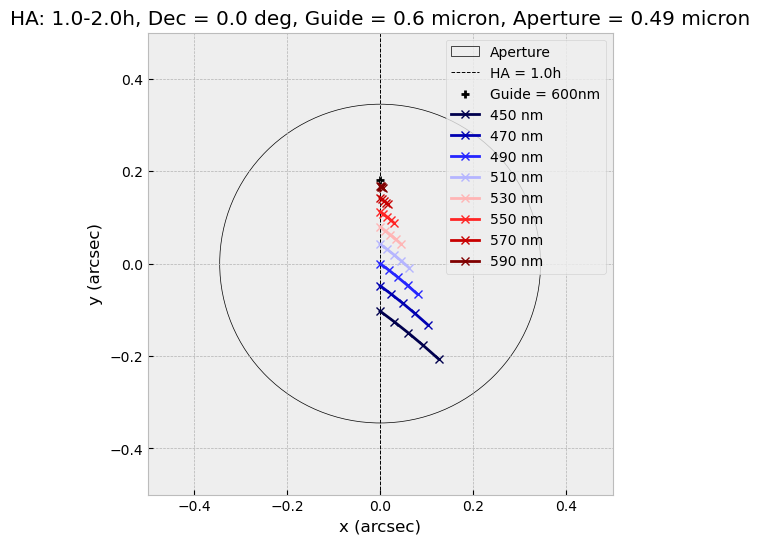

In [4]:
HA_range=np.linspace(1,2,5)
print(HA_range)
aperture=.49*u.micron
guide=.6 * u.micron
targ_dec=0*u.deg

analysis=AD_analysis()
analysis.load_wave('LR','VIS','V','V',sampling=20*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture)

weights = np.arange(0, len(analysis.output_parameters['wave_wavelengths']))
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='seismic')
fig, ax = plt.subplots(figsize=[6,6]) 
circle1 = plt.Circle((0, 0), analysis.output_parameters['aperture_diameter'].value/2, color='black', fill=False, label='Aperture')
ax.add_patch(circle1)    
plt.axvline(0,color='black',linestyle='--',linewidth=0.7,label="HA = {}h".format(analysis.input_parameters['HA_range'][0]))

d = analysis.output_parameters['shifts']
s=analysis.output_parameters['shifts_non_para']
c = analysis.output_parameters['centre_shift']
plt.scatter(0,-c,label='Guide = {}nm'.format(round(analysis.input_parameters['guide_waveref'].value*1000)),color='black',marker='+')
xs=[]
ys=[]
for count,q in enumerate(analysis.output_parameters['para_angles']):
    x=(s[count]+c)*np.sin(q)
    y=(s[count]+c)*np.cos(q)-c
    xs.append(x)
    ys.append(y)
    
xs_new=[]
ys_new=[]
not_equal=0
for i in range(0,len(xs[0])):
    x_new=[]
    y_new=[]
    for o in range(0,len(xs)):
        x_new.append(xs[o][i].value)
        y_new.append(ys[o][i].value)
        
        if round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5) != round(abs(d[o][i]).value,5):
            print(round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5))
            print(round(abs(d[o][i]).value,5))
            print("NOT EQUAL")
            not_equal=1
            
    xs_new.append(x_new)
    ys_new.append(y_new)

for i in range(0,len(xs_new)):
    plt.plot(xs_new[i],np.array(ys_new[i]),marker='x',color=cmap.to_rgba(i),label="%2.0f nm" %(round(analysis.output_parameters['wave_wavelengths'][i].value,0)))

plt.ylim(-0.5,0.5)
plt.xlim(-0.5,0.5)
plt.legend()
plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Aperture = {}".format(analysis.input_parameters['HA_range'][0],analysis.input_parameters['HA_range'][-1],analysis.input_parameters['targ_dec'],guide,aperture))
plt.xlabel("x (arcsec)")
plt.ylabel("y (arcsec)")

if not_equal==0:
    print("SHIFTS FROM CENTRE ARE EQUAL!")       

[1.   1.25 1.5  1.75 2.  ]
Target goes below Horizon above/below HA of +/- 6.0h
SHIFTS FROM CENTRE ARE EQUAL!


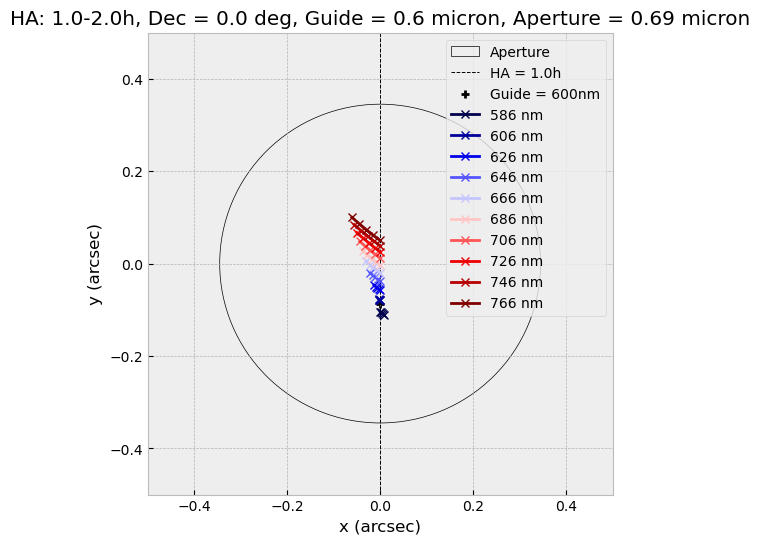

In [5]:
HA_range=np.linspace(1,2,5)
print(HA_range)
aperture=.69*u.micron
guide=.6 * u.micron
targ_dec=0*u.deg

analysis=AD_analysis()
analysis.load_wave('LR','VIS','R','R',sampling=20*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture)

weights = np.arange(0, len(analysis.output_parameters['wave_wavelengths']))
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='seismic')
fig, ax = plt.subplots(figsize=[6,6]) 
circle1 = plt.Circle((0, 0), analysis.output_parameters['aperture_diameter'].value/2, color='black', fill=False, label='Aperture')
ax.add_patch(circle1)    
plt.axvline(0,color='black',linestyle='--',linewidth=0.7,label="HA = {}h".format(analysis.input_parameters['HA_range'][0]))

d = analysis.output_parameters['shifts']
s=analysis.output_parameters['shifts_non_para']
c = analysis.output_parameters['centre_shift']
plt.scatter(0,-c,label='Guide = {}nm'.format(round(analysis.input_parameters['guide_waveref'].value*1000)),color='black',marker='+')
xs=[]
ys=[]
for count,q in enumerate(analysis.output_parameters['para_angles']):
    x=(s[count]+c)*np.sin(q)
    y=(s[count]+c)*np.cos(q)-c
    xs.append(x)
    ys.append(y)
    
xs_new=[]
ys_new=[]
not_equal=0
for i in range(0,len(xs[0])):
    x_new=[]
    y_new=[]
    for o in range(0,len(xs)):
        x_new.append(xs[o][i].value)
        y_new.append(ys[o][i].value)
        
        if round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5) != round(abs(d[o][i]).value,5):
            print(round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5))
            print(round(abs(d[o][i]).value,5))
            print("NOT EQUAL")
            not_equal=1
            
    xs_new.append(x_new)
    ys_new.append(y_new)

for i in range(0,len(xs_new)):
    plt.plot(xs_new[i],np.array(ys_new[i]),marker='x',color=cmap.to_rgba(i),label="%2.0f nm" %(round(analysis.output_parameters['wave_wavelengths'][i].value,0)))

plt.ylim(-0.5,0.5)
plt.xlim(-0.5,0.5)
plt.legend()
plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Aperture = {}".format(analysis.input_parameters['HA_range'][0],analysis.input_parameters['HA_range'][-1],analysis.input_parameters['targ_dec'],guide,aperture))
plt.xlabel("x (arcsec)")
plt.ylabel("y (arcsec)")

if not_equal==0:
    print("SHIFTS FROM CENTRE ARE EQUAL!")       

[1.   1.25 1.5  1.75 2.  ]
Target goes below Horizon above/below HA of +/- 6.0h
SHIFTS FROM CENTRE ARE EQUAL!


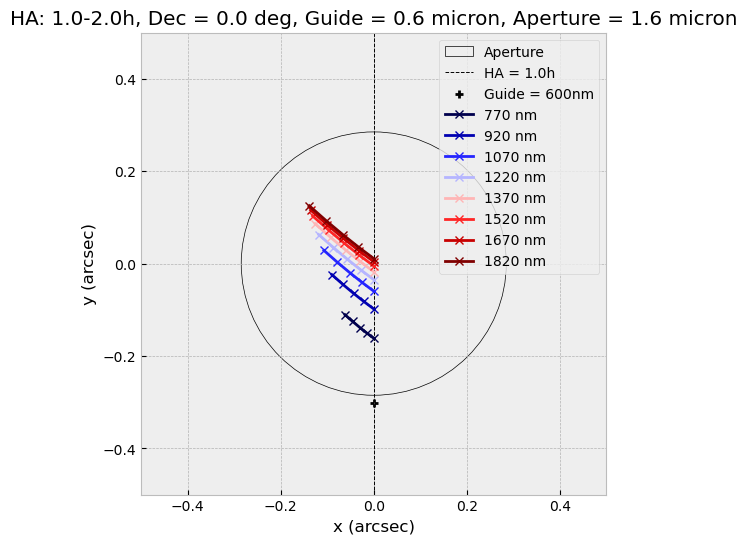

In [6]:
HA_range=np.linspace(1,2,5)
print(HA_range)
aperture=1.6*u.micron
guide=.6 * u.micron
targ_dec=0*u.deg

analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=150*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture)

weights = np.arange(0, len(analysis.output_parameters['wave_wavelengths']))
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='seismic')
fig, ax = plt.subplots(figsize=[6,6]) 
circle1 = plt.Circle((0, 0), analysis.output_parameters['aperture_diameter'].value/2, color='black', fill=False, label='Aperture')
ax.add_patch(circle1)    
plt.axvline(0,color='black',linestyle='--',linewidth=0.7,label="HA = {}h".format(analysis.input_parameters['HA_range'][0]))

d = analysis.output_parameters['shifts']
s=analysis.output_parameters['shifts_non_para']
c = analysis.output_parameters['centre_shift']
plt.scatter(0,-c,label='Guide = {}nm'.format(round(analysis.input_parameters['guide_waveref'].value*1000)),color='black',marker='+')
xs=[]
ys=[]
for count,q in enumerate(analysis.output_parameters['para_angles']):
    x=(s[count]+c)*np.sin(q)
    y=(s[count]+c)*np.cos(q)-c
    xs.append(x)
    ys.append(y)
    
xs_new=[]
ys_new=[]
not_equal=0
for i in range(0,len(xs[0])):
    x_new=[]
    y_new=[]
    for o in range(0,len(xs)):
        x_new.append(xs[o][i].value)
        y_new.append(ys[o][i].value)
        
        if round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5) != round(abs(d[o][i]).value,5):
            print(round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5))
            print(round(abs(d[o][i]).value,5))
            print("NOT EQUAL")
            not_equal=1
            
    xs_new.append(x_new)
    ys_new.append(y_new)

for i in range(0,len(xs_new)):
    plt.plot(xs_new[i],np.array(ys_new[i]),marker='x',color=cmap.to_rgba(i),label="%2.0f nm" %(round(analysis.output_parameters['wave_wavelengths'][i].value,0)))

plt.ylim(-0.5,0.5)
plt.xlim(-0.5,0.5)
plt.legend()
plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Aperture = {}".format(analysis.input_parameters['HA_range'][0],analysis.input_parameters['HA_range'][-1],analysis.input_parameters['targ_dec'],guide,aperture))
plt.xlabel("x (arcsec)")
plt.ylabel("y (arcsec)")

if not_equal==0:
    print("SHIFTS FROM CENTRE ARE EQUAL!")       

# +Y = 0 PA

Target goes below Horizon above/below HA of +/- 7.9h
47.87002088840386
51.721627700772764
55.30890158992905
58.65623467739456
Target goes below Horizon above/below HA of +/- 7.9h
47.87002088840386
43.73070260942859
39.283384709364164
34.513752662811974
SHIFTS FROM CENTRE ARE EQUAL!


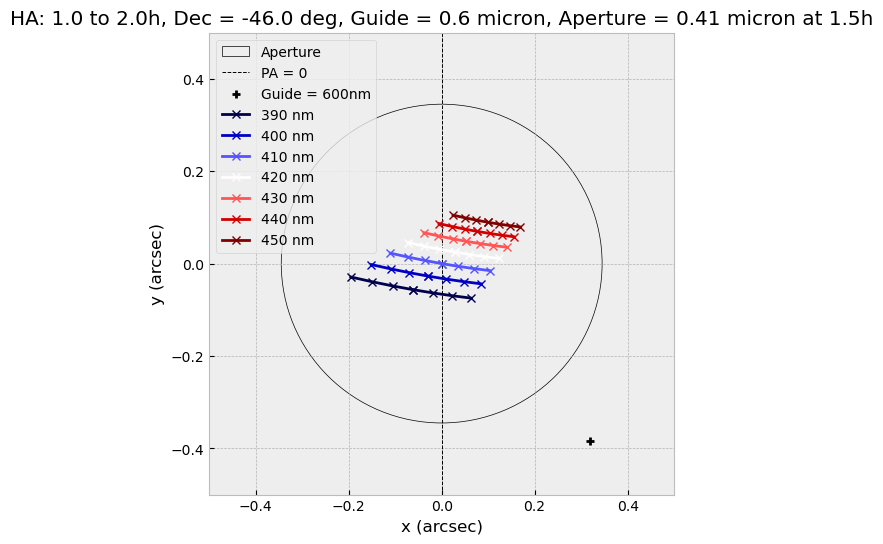

In [51]:
aperture=.41*u.micron
guide=.6 * u.micron
targ_dec=-46*u.deg

HA_ranges=[np.linspace(1.5,2,4),np.linspace(1.5,1,4)]

fig, ax = plt.subplots(figsize=[6,6]) 
circle1 = plt.Circle((0, 0), analysis.output_parameters['aperture_diameter'].value/2, color='black', fill=False, label='Aperture')
ax.add_patch(circle1)    
plt.axvline(0,color='black',linestyle='--',linewidth=0.7,label="PA = 0".format(analysis.input_parameters['HA_range'][0]))
plt.scatter(-c*np.sin(analysis.output_parameters['actual_para_angles'][0]),-c*np.cos(analysis.output_parameters['actual_para_angles'][0]),label='Guide = {}nm'.format(round(analysis.input_parameters['guide_waveref'].value*1000)),color='black',marker='+')

analysis=AD_analysis()
analysis.load_wave('LR','VIS','B','B',sampling=10*u.nm) #Change for wanted observing mode
weights = np.arange(0, len(analysis.output_parameters['wave_wavelengths']))
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='seismic')
for label,HA_range in enumerate(HA_ranges):

    analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
    analysis.calculate_shifts(guide,aperture)

    d = analysis.output_parameters['shifts']
    s=analysis.output_parameters['shifts_non_para']
    c = analysis.output_parameters['centre_shift']

    xs=[]
    ys=[]
    for count,q in enumerate(analysis.output_parameters['actual_para_angles']):
        if targ_dec.value > analysis.conditions['latitude'].value:
            print(np.rad2deg(q))
            x=(s[count]+c)*np.sin(q)-c*np.sin(analysis.output_parameters['actual_para_angles'][0])
            y=(s[count]+c)*np.cos(q)-c*np.cos(analysis.output_parameters['actual_para_angles'][0])
            xs.append(x)
            ys.append(y)
        elif targ_dec.value < analysis.conditions['latitude'].value:
            print(np.rad2deg(q))
            x=(s[count]+c)*np.sin(q)-c*np.sin(analysis.output_parameters['actual_para_angles'][0])
            y=(s[count]+c)*np.cos(q)-c*np.cos(analysis.output_parameters['actual_para_angles'][0])
            xs.append(x)
            ys.append(y)
            
    xs_new=[]
    ys_new=[]
    not_equal=0
    for i in range(0,len(xs[0])):
        x_new=[]
        y_new=[]
        for o in range(0,len(xs)):
            x_new.append(xs[o][i].value)
            y_new.append(ys[o][i].value)
            
            if round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5) != round(abs(d[o][i]).value,5):
                print(round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5))
                print(round(abs(d[o][i]).value,5))
                print("NOT EQUAL")
                not_equal=1
                
            
        xs_new.append(x_new)
        ys_new.append(y_new)

    if label == 1:
        for i in range(0,len(xs_new)):
            plt.plot(xs_new[i],np.array(ys_new[i]),marker='x',color=cmap.to_rgba(i),label="%2.0f nm" %(round(analysis.output_parameters['wave_wavelengths'][i].value,0)))
    else:
         for i in range(0,len(xs_new)):
            plt.plot(xs_new[i],np.array(ys_new[i]),marker='x',color=cmap.to_rgba(i))   
  
plt.ylim(-0.5,0.5)
plt.xlim(-0.5,0.5)
plt.legend()
plt.title("HA: {} to {}h, Dec = {}, Guide = {}, Aperture = {} at {}h".format(HA_ranges[1][-1],HA_ranges[0][-1],analysis.input_parameters['targ_dec'],guide,aperture,HA_ranges[0][0]))
plt.xlabel("x (arcsec)")
plt.ylabel("y (arcsec)")

if not_equal==0:
    print("SHIFTS FROM CENTRE ARE EQUAL!")